<a href="https://colab.research.google.com/github/DeepLabCut/DeepLabCut/blob/pytorch_dlc/examples/COLAB/COLAB_YOURDATA_SuperAnimal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DeepLabCut Model Zoo: SuperAnimal models

![alt text](https://images.squarespace-cdn.com/content/v1/57f6d51c9f74566f55ecf271/1616492373700-PGOAC72IOB6AUE47VTJX/ke17ZwdGBToddI8pDm48kB8JrdUaZR-OSkKLqWQPp_YUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYwL8IeDg6_3B-BRuF4nNrNcQkVuAT7tdErd0wQFEGFSnBqyW03PFN2MN6T6ry5cmXqqA9xITfsbVGDrg_goIDasRCalqV8R3606BuxERAtDaQ/modelzoo.png?format=1000w)

# 🦄 SuperAnimal in DeepLabCut PyTorch! 🔥

This notebook demos how to use our SuperAnimal models within DeepLabCut 3.0! Please read more in [Ye et al. Nature Communications 2024](https://www.nature.com/articles/s41467-024-48792-2) about the available SuperAnimal models, and follow along below!

### **Let's get going: install the latest version of DeepLabCut into COLAB:**

*Also, be sure you are connected to a GPU: go to menu, click Runtime > Change Runtime Type > select "GPU"*


In [ ]:
!pip install --pre deeplabcut

**PLEASE, click "restart runtime" from the output above before proceeding!**

In [2]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

import deeplabcut
import deeplabcut.utils.auxiliaryfunctions as auxiliaryfunctions
from deeplabcut.pose_estimation_pytorch.apis import (
    superanimal_analyze_images,
)
from deeplabcut.modelzoo import build_weight_init
from deeplabcut.modelzoo.utils import (
    create_conversion_table,
    read_conversion_table_from_csv,
)
from deeplabcut.modelzoo.video_inference import video_inference_superanimal
from deeplabcut.utils.pseudo_label import keypoint_matching

Loading DLC 3.0.0rc7...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


## Zero-shot Image & Video Inference
SuperAnimal models are foundation animal pose models. They can be used for zero-shot predictions without further training on the data.
In this section, we show how to use SuperAnimal models to predict pose from images (given an image folder) and output the predicted images (with pose) into another destination folder.

### Zero-shot image inference

If you have a single Image you want to test, upload it here!

#### Upload the images you want to predict

In [3]:
from google.colab import files

uploaded = files.upload()
for filepath, content in uploaded.items():
    print(f"User uploaded file '{filepath}' with length {len(content)} bytes")
image_path = os.path.abspath(filepath)
image_name = os.path.splitext(image_path)[0]

# If this cell fails (e.g., when using Safari in place of Google Chrome),
# manually upload your video via the Files menu to the left
# and define `image_path` yourself with right click > copy path on the image:
#
# image_path = "/path/to/my/image.png"
# image_name = os.path.splitext(image_path)[0]

ModuleNotFoundError: No module named 'google.colab'

In [4]:
filepath="/home/ti_wang/Ti_workspace/PrimatePose/Vis/samples/original_oap_00208_oap_anoID_46.JPG"

image_path = os.path.abspath(filepath)
basename = os.path.basename(image_path)
image_name = basename.split('.')[0]
print(image_path)
print(image_name)

# If this cell fails (e.g., when using Safari in place of Google Chrome),
# manually upload your video via the Files menu to the left
# and define `image_path` yourself with right click > copy path on the image:
#
# image_path = "/path/to/my/image.png"
# image_name = os.path.splitext(image_path)[0]

/home/ti_wang/Ti_workspace/PrimatePose/Vis/samples/original_oap_00208_oap_anoID_46.JPG
original_oap_00208_oap_anoID_46


#### Select a SuperAnimal name and corresponding model architecture

Check Our Docs on [SuperAnimals](https://github.com/DeepLabCut/DeepLabCut/blob/main/docs/ModelZoo.md) to learn more!

In [5]:
# @markdown ---
# @markdown SuperAnimal Configurations
superanimal_name = "superanimal_quadruped" #@param ["superanimal_topviewmouse", "superanimal_quadruped"]
model_name = "hrnet_w32" #@param ["hrnet_w32"]
detector_name = "fasterrcnn_resnet50_fpn_v2" #@param ["fasterrcnn_resnet50_fpn_v2"]

# @markdown ---
# @markdown What is the maximum number of animals you expect to have in an image
max_individuals = 1  # @param {type:"slider", min:1, max:30, step:1}

100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


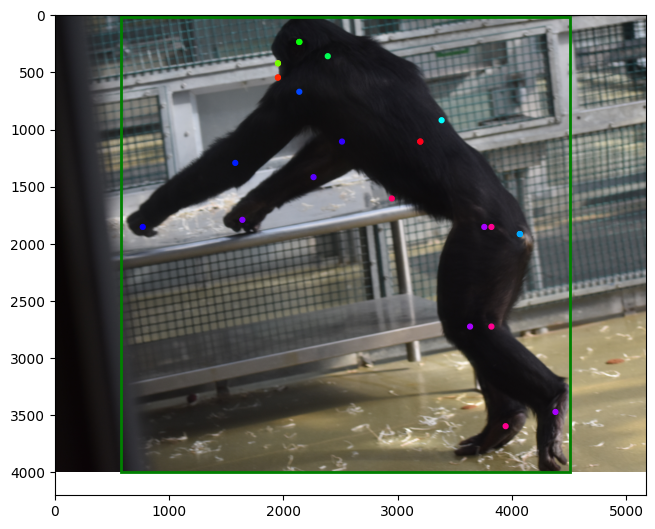

In [6]:
# Note you need to enter max_individuals correctly to get the correct number of predictions in the image.
_ = superanimal_analyze_images(
    superanimal_name,
    model_name,
    detector_name,
    image_path,
    max_individuals,
    out_folder="/home/ti_wang/Ti_workspace/PrimatePose/SuperAnimalEvaluation/vis/.",
)

### Zero-shot Video Inference

This can be done with or without video adaptation (faster, but not self-supervised fine-tuned on your data!).

#### Upload a video you want to predict

In [7]:
# from google.colab import files

# uploaded = files.upload()
# for filepath, content in uploaded.items():
#     print(f"User uploaded file '{filepath}' with length {len(content)} bytes")
# video_path = os.path.abspath(filepath)
# video_name = os.path.splitext(video_path)[0]

video_path = "/home/ti_wang/Ti_workspace/PrimatePose/data/demo/a_monkey_50frames/a_monkey_50frames.mp4"
video_name = "a_monkey_50frame"
# If this cell fails (e.g., when using Safari in place of Google Chrome),
# manually upload your video via the Files menu to the left
# and define `video_path` yourself with right click > copy path on the video.

#### Choose the superanimal and the model name

In [18]:
# @markdown ---
# @markdown SuperAnimal Configurations
superanimal_name = "superanimal_quadruped" #@param ["superanimal_topviewmouse", "superanimal_quadruped"]
model_name = "hrnet_w32" #@param ["hrnet_w32"]
detector_name = "fasterrcnn_resnet50_fpn_v2" #@param ["fasterrcnn_resnet50_fpn_v2"]

# @markdown ---
# @markdown What is the maximum number of animals you expect to have in an image
max_individuals = 1  # @param {type:"slider", min:1, max:30, step:1}

#### Zero-shot Video Inference without video adaptation

The labeled video (and pose predictions for the video) are saved in `"/content/"`, with the labeled video name being `{your_video_name}_superanimal_{superanimal_name}_hrnetw32_labeled.mp4`.

In [12]:
_ = video_inference_superanimal(
    videos=video_path,
    superanimal_name=superanimal_name,
    model_name=model_name,
    detector_name=detector_name,
    video_adapt=False,
    max_individuals=max_individuals,
    dest_folder="/home/ti_wang/Ti_workspace/PrimatePose/SuperAnimalEvaluation/vis/.",
)

Running video inference on /home/ti_wang/Ti_workspace/PrimatePose/data/demo/a_monkey_50frames/a_monkey_50frames.mp4 with superanimal_quadruped_hrnet_w32
Using pytorch for model hrnet_w32
/home/ti_wang/Ti_workspace/PrimatePose/DeepLabCut/deeplabcut/modelzoo/checkpoints/superanimal_quadruped_fasterrcnn_resnet50_fpn_v2.pt
detector_path: /home/ti_wang/Ti_workspace/PrimatePose/DeepLabCut/deeplabcut/modelzoo/checkpoints/superanimal_quadruped_fasterrcnn_resnet50_fpn_v2.pt
Processing video /home/ti_wang/Ti_workspace/PrimatePose/data/demo/a_monkey_50frames/a_monkey_50frames.mp4
Starting to analyze /home/ti_wang/Ti_workspace/PrimatePose/data/demo/a_monkey_50frames/a_monkey_50frames.mp4
Video metadata: 
  Overall # of frames:    50
  Duration of video [s]:  2.00
  fps:                    25.0
  resolution:             w=3840, h=2160

Running detector with batch size 1


100%|██████████| 50/50 [00:06<00:00,  7.88it/s]


Running pose prediction with batch size 1


100%|██████████| 50/50 [00:03<00:00, 14.11it/s]
/home/ti_wang/Ti_workspace/PrimatePose/DeepLabCut/deeplabcut/utils/make_labeled_video.py:146: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Dataframe.groupby(level="individuals", axis=1).size().values // 3


Saving results to /home/ti_wang/Ti_workspace/PrimatePose/SuperAnimalEvaluation/vis/.
Saving results in /home/ti_wang/Ti_workspace/PrimatePose/SuperAnimalEvaluation/vis/a_monkey_50frames_superanimal_quadruped_fasterrcnn_resnet50_fpn_v2_hrnet_w32.h5 and /home/ti_wang/Ti_workspace/PrimatePose/SuperAnimalEvaluation/vis/a_monkey_50frames_superanimal_quadruped_fasterrcnn_resnet50_fpn_v2_hrnet_w32_full.pickle
Duration of video [s]: 2.0, recorded with 25.0 fps!
Overall # of frames: 50 with cropped frame dimensions: 3840 2160
Generating frames and creating video.


100%|██████████| 50/50 [00:01<00:00, 31.46it/s]

Video with predictions was saved as /home/ti_wang/Ti_workspace/PrimatePose/SuperAnimalEvaluation/vis


#### Zero-shot Video Inference with video adaptation (unsupervised)

The labeled video (and pose predictions for the video) are saved in `"/content/"`, with the labeled video name being `{your_video_name}_superanimal_{superanimal_name}_hrnetw32_labeled_after_adapt.mp4`.

In [13]:
_ = video_inference_superanimal(
    videos=[video_path],
    superanimal_name=superanimal_name,
    model_name=model_name,
    detector_name=detector_name,
    video_adapt=True,
    max_individuals=max_individuals,
    pseudo_threshold=0.1,
    bbox_threshold=0.9,
    detector_epochs=1,
    pose_epochs=1,
    dest_folder="/home/ti_wang/Ti_workspace/PrimatePose/SuperAnimalEvaluation/vis/video_inference_w_video_adaption/."
)

Running video inference on ['/home/ti_wang/Ti_workspace/PrimatePose/data/demo/a_monkey_50frames/a_monkey_50frames.mp4'] with superanimal_quadruped_hrnet_w32
Using pytorch for model hrnet_w32
/home/ti_wang/Ti_workspace/PrimatePose/DeepLabCut/deeplabcut/modelzoo/checkpoints/superanimal_quadruped_fasterrcnn_resnet50_fpn_v2.pt
Using /home/ti_wang/Ti_workspace/PrimatePose/data/demo/a_monkey_50frames/a_monkey_50frames.mp4 for video adaptation training
detector_path: /home/ti_wang/Ti_workspace/PrimatePose/DeepLabCut/deeplabcut/modelzoo/checkpoints/superanimal_quadruped_fasterrcnn_resnet50_fpn_v2.pt
Processing video /home/ti_wang/Ti_workspace/PrimatePose/data/demo/a_monkey_50frames/a_monkey_50frames.mp4
Starting to analyze /home/ti_wang/Ti_workspace/PrimatePose/data/demo/a_monkey_50frames/a_monkey_50frames.mp4
Video metadata: 
  Overall # of frames:    50
  Duration of video [s]:  2.00
  fps:                    25.0
  resolution:             w=3840, h=2160

Running detector with batch size 1


100%|██████████| 50/50 [00:06<00:00,  7.86it/s]


Running pose prediction with batch size 1


100%|██████████| 50/50 [00:03<00:00, 14.08it/s]
/home/ti_wang/Ti_workspace/PrimatePose/DeepLabCut/deeplabcut/utils/make_labeled_video.py:146: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Dataframe.groupby(level="individuals", axis=1).size().values // 3


Saving results to /home/ti_wang/Ti_workspace/PrimatePose/SuperAnimalEvaluation/vis/video_inference_w_video_adaption/.
Saving results in /home/ti_wang/Ti_workspace/PrimatePose/SuperAnimalEvaluation/vis/video_inference_w_video_adaption/a_monkey_50frames_superanimal_quadruped_fasterrcnn_resnet50_fpn_v2_hrnet_w32.h5 and /home/ti_wang/Ti_workspace/PrimatePose/SuperAnimalEvaluation/vis/video_inference_w_video_adaption/a_monkey_50frames_superanimal_quadruped_fasterrcnn_resnet50_fpn_v2_hrnet_w32_full.pickle
Duration of video [s]: 2.0, recorded with 25.0 fps!
Overall # of frames: 50 with cropped frame dimensions: 3840 2160
Generating frames and creating video.


100%|██████████| 50/50 [00:01<00:00, 31.07it/s]


Video with predictions was saved as /home/ti_wang/Ti_workspace/PrimatePose/SuperAnimalEvaluation/vis/video_inference_w_video_adaption
Video frames being extracted to /home/ti_wang/Ti_workspace/PrimatePose/data/demo/a_monkey_50frames/pseudo_a_monkey_50frames/images for video adaptation.
Constructing pseudo dataset at /home/ti_wang/Ti_workspace/PrimatePose/data/demo/a_monkey_50frames/pseudo_a_monkey_50frames
Running video adaptation with following parameters:
  (pose training) pose_epochs: 1
  (pose) save_epochs: 1
  detector_epochs: 1
  detector_save_epochs: 1
  video adaptation batch size: 8



Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /home/ti_wang/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100%|██████████| 167M/167M [00:00<00:00, 211MB/s]  
/home/ti_wang/Ti_workspace/PrimatePose/DeepLabCut/deeplabcut/pose_estimation_pytorch/data/transforms.py:51: UserWarning: Be careful! Do not train pose models with horizontal flips if you have symmetric keypoints!
  warnings.warn(
Data Transforms:
  Training:   Compose([
  HorizontalFlip(always_apply=False, p=0.5),
  Affine(always_apply=False, p=0.5, interpolation=1, mask_interpolation=0, cval=0, mode=0, scale={'x': (1.0, 1.0), 'y': (1.0, 1.0)}, translate_percent=None, translate_px={'x': (-40, 40), 'y': (-40, 40)}, rotate=(-30, 30), fit_output=False, shear={'x': (0.0, 0.0), 'y': (0.0, 0.0)}, cval_mask=0, keep_ratio=True, rotate_method='largest_box'),
  Normalize(always_apply=False, p=1.0, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel

detector_path: /home/ti_wang/Ti_workspace/PrimatePose/data/demo/a_monkey_50frames/pseudo_a_monkey_50frames/checkpoints/snapshot-fasterrcnn_resnet50_fpn_v2-001.pt
Processing video /home/ti_wang/Ti_workspace/PrimatePose/data/demo/a_monkey_50frames/a_monkey_50frames.mp4
Starting to analyze /home/ti_wang/Ti_workspace/PrimatePose/data/demo/a_monkey_50frames/a_monkey_50frames.mp4
Video metadata: 
  Overall # of frames:    50
  Duration of video [s]:  2.00
  fps:                    25.0
  resolution:             w=3840, h=2160

Running detector with batch size 1


100%|██████████| 50/50 [00:06<00:00,  7.86it/s]


Running pose prediction with batch size 1


100%|██████████| 50/50 [00:03<00:00, 13.95it/s]
/home/ti_wang/Ti_workspace/PrimatePose/DeepLabCut/deeplabcut/utils/make_labeled_video.py:146: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Dataframe.groupby(level="individuals", axis=1).size().values // 3


Saving results to /home/ti_wang/Ti_workspace/PrimatePose/SuperAnimalEvaluation/vis/video_inference_w_video_adaption/.
Saving results in /home/ti_wang/Ti_workspace/PrimatePose/SuperAnimalEvaluation/vis/video_inference_w_video_adaption/a_monkey_50frames_superanimal_quadruped_snapshot-fasterrcnn_resnet50_fpn_v2-001_snapshot-hrnet_w32-001.h5 and /home/ti_wang/Ti_workspace/PrimatePose/SuperAnimalEvaluation/vis/video_inference_w_video_adaption/a_monkey_50frames_superanimal_quadruped_snapshot-fasterrcnn_resnet50_fpn_v2-001_snapshot-hrnet_w32-001_full.pickle
Duration of video [s]: 2.0, recorded with 25.0 fps!
Overall # of frames: 50 with cropped frame dimensions: 3840 2160
Generating frames and creating video.


100%|██████████| 50/50 [00:01<00:00, 31.17it/s]

Video with predictions was saved as /home/ti_wang/Ti_workspace/PrimatePose/SuperAnimalEvaluation/vis/video_inference_w_video_adaption


## Training with SuperAnimal

In this section, we compare different ways to train models in DeepLabCut 3.0, with or without using SuperAnimal-pretrained models.
You can compare the evaluation results and get a sense of each baseline. We have following baselines:

- ImageNet transfer learning (training without superanimal)
- SuperAnimal transfer learning (baseline 1)
- SuperAnimal naive fine-tuning (baseline 2)
- SuperAnimal memory-replay fine-tuning (baseline3)

This is done on one of your DeepLabCut projects! If you don't have a DeepLabCut project that you can use SuperAnimal models with, you can always using the example openfield dataset [available in the DeepLabCut repository](https://github.com/DeepLabCut/DeepLabCut/tree/main/examples/openfield-Pranav-2018-10-30) or the Tri-Mouse dataset available on [Zenodo](https://zenodo.org/records/5851157).

### Preparing the DeepLabCut Project

First, place your DeepLabCut project folder into you google drive! "i.e. move the folder named "Project-YourName-TheDate" into Google Drive.

In [ ]:
# Now, let's link to your GoogleDrive. Run this cell and follow the
# authorization instructions:

from google.colab import drive
drive.mount('/content/drive')

You will need to edit the project path in the config.yaml file to be set to your Google Drive link!

Typically, this will be in the format: `/content/drive/MyDrive/yourProjectFolderName`. You can obtain this path by going to the file navigator in the left pane, finding your DeepLabCut project folder, clicking on the vertical `...` next to the folder name and selecting "Copy path".

If the `drive` folder is not immediately visible after mounting the drive, refresh the available files!

In [8]:
# TODO: Update the `project_path` to be the path of your DeepLabCut project!
project_path = Path("/home/ti_wang/Ti_workspace/PrimatePose/SuperAnimalEvaluation/test_dlc/pfm-dlc-2025-03-28")
config_path = str(project_path / "config.yaml")

Then, use the panel below to select the appropriate SuperAnimal model for your project (don't forget to run the cell)!

In [9]:
# @markdown ---
# @markdown SuperAnimal Configurations
superanimal_name = "superanimal_quadruped" #@param ["superanimal_topviewmouse", "superanimal_quadruped"]
model_name = "hrnet_w32" #@param ["hrnet_w32"]
detector_name = "fasterrcnn_resnet50_fpn_v2" #@param ["fasterrcnn_resnet50_fpn_v2"]

### Comparison between different training baselines


Definition of data split: the unique combination of training images and testing images.
We create a data split named split 0. All baselines will share the data split to make fair comparisons.
- split 0 -> shared by all baselines
- shuffle 0 (split0) -> imagenet transfer learning
- shuffle 1 (split0) -> superanimal transfer learning
- shuffle 2 (split0) -> superanimal naive fine-tuning
- shuffle 3 (split0) -> superanimal memory-replay fine-tuning

### What is the difference between baselines?

**Transfer learning** For canonical task-agnostic transfer learning,
the encoder learns universal visual features from a large pre-training dataset, and a randomly
initialized decoder is used to learn the pose from the downstream dataset.

**Fine-tuning** For task aware
fine-tuning, both encoder and decoder learn task-related visual-pose features
in the pre-training datasets, and the decoder is fine-tuned to update pose
priors in downstream datasets. Crucially, the network has pose-estimation-specific
weights

**ImageNet transfer-learning** The encoder was pre-trained from ImageNet. The decoder is trained from scratch in the downstream tasks

**SuperAnimal transfer-learning** The encoder was pre-trained first from ImageNet, then in pose datasets we colleceted. Then decoder is trained from scratch in downstream tasks.

**SuperAnimal naive fine-tuning** Both the encoder and the decoder were pre-trained in pose datasets we collected. In downstream datasets, we only finetune convolutional channels that correspond to the annotated keypoints in the downstream datasets. This introduces catastrophic forgetting in keypoints that are not annotated in the downstream datasets.

**SuperAnimal memory-replay fine-tuning** If we apply fine-tuning with SuperAnimal without further cares, the models will forget about keypoints that are not annotated in the downstream datasets. To mitigate this, we mix the annotations and zero-shot predictions of SuperAnimal models to create a dataset that 'replays' the memory of the SuperAnimal keypoints.




In [10]:
imagenet_transfer_learning_shuffle = 0
superanimal_transfer_learning_shuffle = 1
superanimal_naive_finetune_shuffle = 2
superanimal_memory_replay_shuffle = 3

In [11]:
deeplabcut.create_training_dataset(
    config_path,
    Shuffles=[imagenet_transfer_learning_shuffle],
    net_type=f"top_down_{model_name}",
    detector_type=detector_name,
    engine=deeplabcut.Engine.PYTORCH,
    userfeedback=False,
)

Valid subgraph found...
Utilizing the following graph: [[2, 33], [2, 24], [2, 28], [2, 10], [2, 21], [2, 14], [1, 2], [2, 5], [13, 33], [6, 33], [18, 23], [10, 18], [12, 18], [0, 18], [18, 35], [18, 26], [4, 23], [16, 23], [7, 23], [8, 23], [6, 35], [6, 11], [6, 29], [6, 10], [6, 22], [6, 13], [6, 25], [14, 35], [32, 35], [15, 35], [34, 35], [13, 35], [20, 35], [4, 27], [4, 22], [4, 24], [4, 19], [3, 27], [13, 29], [13, 20], [13, 28], [17, 29], [19, 29], [22, 29], [10, 29], [16, 29], [20, 29], [3, 29], [15, 29], [10, 24], [15, 24], [24, 34], [24, 28], [17, 24], [1, 10], [10, 11], [10, 16], [10, 26], [5, 10], [10, 15], [8, 14], [14, 30], [14, 15], [14, 22], [14, 26], [8, 28], [8, 31], [3, 8], [8, 9], [12, 28], [1, 28], [28, 31], [28, 36], [22, 28], [11, 28], [20, 28], [11, 34], [11, 21], [11, 15], [9, 11], [19, 34], [16, 34], [31, 34], [15, 34], [34, 36], [3, 21], [3, 15], [3, 26], [0, 21], [12, 20], [12, 26], [17, 20], [17, 25], [17, 30], [16, 17], [22, 32], [0, 15], [0, 1], [5, 15], [

100%|██████████| 55/55 [00:00<00:00, 5056.92it/s]

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


### ImageNet transfer learning

Historically, the transfer learning using ImageNet weights strategies assumed no “animal pose task priors” in the pretrained
model, a paradigm adopted from previous task-agnostic transfer learning.

You can change the number of epochs you want to train for. How long training will take depends on many parameters, including the number of images in your dataset, the resolution of the images, and the number of epochs you train for.

In [29]:
!export CUDA_VISIBLE_DEVICES=1

In [19]:
# Note we skip the detector training to save time.
# For Top-Down models, the evaluation is by default using ground-truth bounding
#  boxes. But to train a model that can be used to inference videos and images,
#  you have to set detector_epochs > 0.
device = "cuda:1"
deeplabcut.train_network(
    config_path,
    detector_epochs=0,
    epochs=50,
    save_epochs=10,
    batch_size=64,  # if you get a CUDA OOM error when training on a GPU, reduce to 32, 16, ...!
    displayiters=10,
    shuffle=imagenet_transfer_learning_shuffle,
    device=device,
)

Training with configuration:
data:
  colormode: RGB
  inference:
    normalize_images: True
    top_down_crop:
      width: 256
      height: 256
    auto_padding:
      pad_width_divisor: 32
      pad_height_divisor: 32
  train:
    affine:
      p: 0.5
      rotation: 30
      scaling: [1.0, 1.0]
      translation: 0
    collate: None
    covering: False
    gaussian_noise: 12.75
    hist_eq: False
    motion_blur: False
    normalize_images: True
    top_down_crop:
      width: 256
      height: 256
    auto_padding:
      pad_width_divisor: 32
      pad_height_divisor: 32
detector:
  data:
    colormode: RGB
    inference:
      normalize_images: True
    train:
      affine:
        p: 0.5
        rotation: 30
        scaling: [1.0, 1.0]
        translation: 40
      collate:
        type: ResizeFromDataSizeCollate
        min_scale: 0.4
        max_scale: 1.0
        min_short_side: 128
        max_short_side: 1152
        multiple_of: 32
        to_square: False
      hflip: Tru

Now let's evaluate the performance of our trained models.

In [21]:
deeplabcut.evaluate_network(config_path, Shuffles=[imagenet_transfer_learning_shuffle])

The detector_snapshot_index was set to -1 but no detector snapshots were found in /home/ti_wang/Ti_workspace/PrimatePose/SuperAnimalEvaluation/test_dlc/pfm-dlc-2025-03-28/dlc-models-pytorch/iteration-0/pfmMar28-trainset95shuffle0/train. Using ground truth bounding boxes to compute metrics.
To analyze videos with a top-down model, you'll need to train a detector!


100%|██████████| 3/3 [00:00<00:00, 35.41it/s]


Evaluation results for DLC_HrnetW32_pfmMar28shuffle0_snapshot_040-results.csv (pcutoff: 0.6):
train rmse            64.82
train rmse_pcutoff      NaN
train mAP             39.26
train mAR             43.09
test rmse             38.86
test rmse_pcutoff       NaN
test mAP              68.22
test mAR              70.00
Name: (0.95, 0, 40, -1, 0.6), dtype: float64


### Transfer learning with SuperAnimal weights

First, we prepare training shuffle for transfer-learning with SuperAnimal weights. As we've already create a shuffle with a train/test split that we want to reuse, we use `deeplabcut.create_training_dataset_from_existing_split` to keep the same train/test indices as in the ImageNet transfer learning shuffle.

We specify that we want to initialize the model weights with the selected SuperAnimal model, but without keeping the decoding layers (this is called transfer learning)!



In [23]:
weight_init = build_weight_init(
    cfg=auxiliaryfunctions.read_config(config_path), 
    super_animal=superanimal_name,
    model_name=model_name,
    detector_name=detector_name,
    with_decoder=False,
)

deeplabcut.create_training_dataset_from_existing_split(
    config_path,
    from_shuffle=imagenet_transfer_learning_shuffle,
    shuffles=[superanimal_transfer_learning_shuffle],
    engine=deeplabcut.Engine.PYTORCH,
    net_type=f"top_down_{model_name}",
    detector_type=detector_name,
    weight_init=weight_init,
    userfeedback=False,
)

Valid subgraph found...
Utilizing the following graph: [[5, 25], [0, 5], [5, 21], [5, 29], [5, 26], [5, 10], [4, 25], [19, 25], [25, 27], [25, 28], [15, 25], [25, 29], [18, 25], [2, 6], [2, 33], [2, 13], [2, 16], [6, 23], [6, 16], [6, 13], [6, 7], [4, 12], [4, 19], [7, 32], [7, 16], [7, 28], [7, 22], [7, 30], [7, 21], [0, 7], [0, 32], [15, 32], [23, 32], [29, 32], [32, 33], [0, 28], [0, 21], [0, 8], [0, 1], [0, 29], [0, 26], [0, 33], [11, 28], [21, 28], [26, 28], [15, 28], [10, 28], [22, 27], [8, 22], [22, 35], [19, 22], [3, 27], [8, 27], [20, 27], [11, 20], [11, 19], [11, 12], [11, 17], [1, 11], [13, 20], [19, 20], [15, 20], [16, 29], [3, 16], [16, 30], [15, 29], [8, 29], [14, 19], [19, 34], [9, 19], [24, 26], [24, 31], [8, 24], [21, 24], [24, 33], [18, 24], [18, 26], [21, 26], [26, 36], [10, 26], [3, 23], [12, 23], [12, 36], [12, 33], [10, 12], [9, 12], [12, 13], [12, 30], [12, 17], [18, 23], [9, 34], [9, 30], [9, 36], [34, 36], [18, 34], [1, 34], [13, 21], [1, 13], [13, 14], [15, 36

100%|██████████| 55/55 [00:00<00:00, 71932.25it/s]

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


Then, we launch the training for transfer-learning with SuperAnimal weights.

In [25]:
device = "cuda:1"
deeplabcut.train_network(
    config_path,
    detector_epochs=0,
    epochs=50, #  50
    save_epochs=10,
    batch_size=64,  # if you get a CUDA OOM error when training on a GPU, reduce to 32, 16, ...!
    displayiters=10,
    shuffle=superanimal_transfer_learning_shuffle,
    device=device,
)

Training with configuration:
data:
  colormode: RGB
  inference:
    normalize_images: True
    top_down_crop:
      width: 256
      height: 256
    auto_padding:
      pad_width_divisor: 32
      pad_height_divisor: 32
  train:
    affine:
      p: 0.5
      rotation: 30
      scaling: [1.0, 1.0]
      translation: 0
    collate: None
    covering: False
    gaussian_noise: 12.75
    hist_eq: False
    motion_blur: False
    normalize_images: True
    top_down_crop:
      width: 256
      height: 256
    auto_padding:
      pad_width_divisor: 32
      pad_height_divisor: 32
detector:
  data:
    colormode: RGB
    inference:
      normalize_images: True
    train:
      affine:
        p: 0.5
        rotation: 30
        scaling: [1.0, 1.0]
        translation: 40
      collate:
        type: ResizeFromDataSizeCollate
        min_scale: 0.4
        max_scale: 1.0
        min_short_side: 128
        max_short_side: 1152
        multiple_of: 32
        to_square: False
      hflip: Tru

Finally, we evaluate the model obtained by transfer-learning with SuperAnimal weights.

In [28]:
deeplabcut.evaluate_network(config_path, Shuffles=[superanimal_transfer_learning_shuffle])

The detector_snapshot_index was set to -1 but no detector snapshots were found in /home/ti_wang/Ti_workspace/PrimatePose/SuperAnimalEvaluation/test_dlc/pfm-dlc-2025-03-28/dlc-models-pytorch/iteration-0/pfmMar28-trainset95shuffle1/train. Using ground truth bounding boxes to compute metrics.
To analyze videos with a top-down model, you'll need to train a detector!


100%|██████████| 3/3 [00:00<00:00, 34.13it/s]

Evaluation results for DLC_HrnetW32_pfmMar28shuffle1_snapshot_050-results.csv (pcutoff: 0.6):
train rmse            52.26
train rmse_pcutoff    11.58
train mAP             51.20
train mAR             55.82
test rmse             53.46
test rmse_pcutoff     13.51
test mAP              60.00
test mAR              60.00
Name: (0.95, 1, 50, -1, 0.6), dtype: float64


### Fine-tuning with SuperAnimal (without keeping full SuperAnimal keypoints)

#### Setup the weight init and dataset

First we do keypoint matching. This steps make it possible to understand the correspondence between the existing annotations and SuperAnimal annotations. This step produces 3 outputs
- The confusion matrix
- The conversion table
- Pseudo predictions over the whole dataset

#### What is keypoint matching?

Because SuperAnimal models have their pre-defined keypoints that are potentially different from your annotations, we proposed this algorithm to minimize the gap between the model and the dataset. We use our model to perform zero-shot inference on the whole dataset. This gives pairs of predictions and ground truth for every image. Then, we cast the matching between models’ predictions (2D coordinates)
and ground truth as bipartitematching using the Euclidean distance as the cost between paired of keypoints. We then solve the matching using the Hungarian algorithm. Thus for every image, we end up getting a matching matrix where 1 counts formatch and 0 counts for non-matching. Because the models’ predictions can be noisy from image to image, we average the aforementioned matching matrix across all the images and perform another bipartite matching, resulting in the final keypoint conversion table between the model and the dataset. Note that the quality of the matching will impact the performance
of the model, especially for zero-shot. In the case where, e.g., the annotation nose is mistakenly converted to keypoint tail and vice versa, the model will have to unlearn the channel that corresponds to nose and tail (see also case study in Mathis et al.).

Before checking trainset temp_dataset
Before checking testset temp_dataset
detector_path: /home/ti_wang/Ti_workspace/PrimatePose/DeepLabCut/deeplabcut/modelzoo/checkpoints/superanimal_quadruped_fasterrcnn_resnet50_fpn_v2.pt


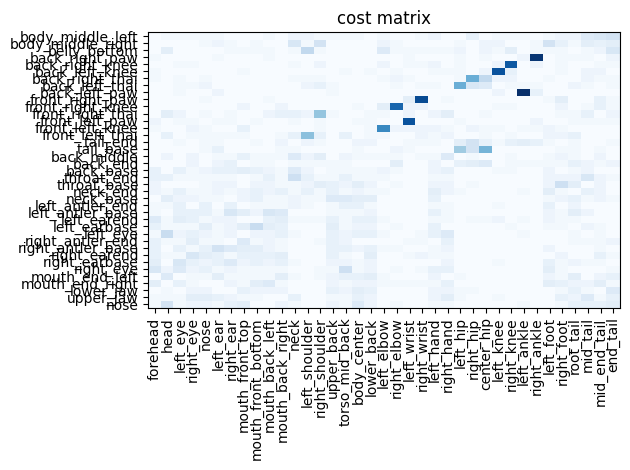

In [14]:
keypoint_matching(
    config_path,
    superanimal_name,
    model_name,
    detector_name,
    copy_images=True,
)

conversion_table_path = project_path / "memory_replay" / "conversion_table.csv"
confusion_matrix_path = project_path / "memory_replay" / "confusion_matrix.png"

# You can visualize the pseudo predictions, or do pose embedding clustering etc.
pseudo_prediction_path = project_path / "memory_replay" / "pseudo_predictions.json"

#### Display the confusion matrix

The x axis lists the keypoints in the existing annotations. The y axis lists the keypoints in SuperAnimal keypoint space. Darker color encodes stronger correspondence between the human annotation and SuperAnimal annotations.

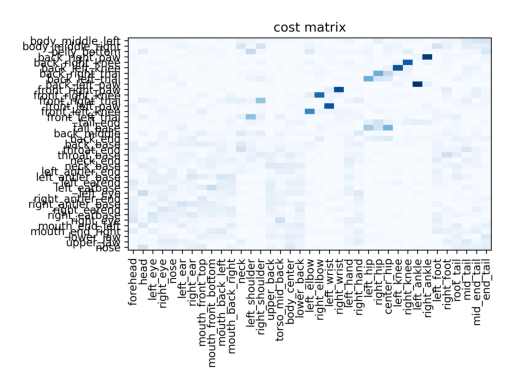

In [36]:
confusion_matrix_image = Image.open(confusion_matrix_path)

plt.imshow(confusion_matrix_image)
plt.axis('off')  # Hide the axes for better view
plt.show()

#### Display the conversion table
The gt columns represents the keypoint names in the existing dataset. The MasterName represents the corresponding keypoints in SuperAnimal keypoint space.

In [37]:
df = pd.read_csv(conversion_table_path)
df = df.dropna()

df

,gt,MasterName
0,body_center,nose
1,mid_tail,upper_jaw
2,lower_back,lower_jaw
3,mouth_back_left,mouth_end_right
4,mouth_back_right,mouth_end_left
5,torso_mid_back,right_eye
6,left_eye,right_earbase
7,right_eye,right_earend
8,left_ear,right_antler_base
9,mouth_front_top,right_antler_end


#### Adding the Conversion Table to your project's `config.yaml` file

Once you've run keypoint matching, you can add the conversion table to your project's `config.yaml` file, and edit it if there are some matches you think are wrong. As an example, for a top-view mouse dataset with 4 bodyparts labeled (`'snout', 'leftear', 'rightear', 'tailbase'`), the conversion table mapping project bodyparts to SuperAnimal bodyparts would be added as:

```yaml
# Conversion tables to fine-tune SuperAnimal weights
SuperAnimalConversionTables:
  superanimal_topviewmouse:
    snout: nose
    leftear: left_ear
    rightear: right_ear
    tailbase: tail_base
```


In [39]:
create_conversion_table(
    config=config_path,
    super_animal=superanimal_name,
    project_to_super_animal=read_conversion_table_from_csv(
        conversion_table_path
    ),
)

ConversionTable(super_animal='superanimal_quadruped', project_bodyparts=['forehead', 'head', 'left_eye', 'right_eye', 'nose', 'left_ear', 'right_ear', 'mouth_front_top', 'mouth_front_bottom', 'mouth_back_left', 'mouth_back_right', 'neck', 'left_shoulder', 'right_shoulder', 'upper_back', 'torso_mid_back', 'body_center', 'lower_back', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hand', 'right_hand', 'left_hip', 'right_hip', 'center_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle', 'left_foot', 'right_foot', 'root_tail', 'mid_tail', 'mid_end_tail', 'end_tail'], super_animal_bodyparts=['nose', 'upper_jaw', 'lower_jaw', 'mouth_end_right', 'mouth_end_left', 'right_eye', 'right_earbase', 'right_earend', 'right_antler_base', 'right_antler_end', 'left_eye', 'left_earbase', 'left_earend', 'left_antler_base', 'left_antler_end', 'neck_base', 'neck_end', 'throat_base', 'throat_end', 'back_base', 'back_end', 'back_middle', 'tail_base', 'tail_end', 'front_left_thai', 'f

#### Prepare the training shuffle and weight initialization for (naive) fine-tuning with SuperAnimal weights

Then, when you call `build_weight_init` with `with_decoder=True`, the conversion table in your project's `config.yaml` is used to get predictions for the correct bodyparts.

In [41]:
weight_init = build_weight_init(
    cfg=auxiliaryfunctions.read_config(config_path), 
    super_animal=superanimal_name,
    model_name=model_name,
    detector_name=detector_name,
    with_decoder=True,
)

deeplabcut.create_training_dataset_from_existing_split(
    config_path,
    from_shuffle=imagenet_transfer_learning_shuffle,
    shuffles=[superanimal_naive_finetune_shuffle],
    engine=deeplabcut.Engine.PYTORCH,
    net_type=f"top_down_{model_name}",
    detector_type=detector_name,
    weight_init=weight_init,
    userfeedback=False,
)

Valid subgraph found...
Utilizing the following graph: [[22, 31], [3, 22], [22, 30], [5, 22], [19, 22], [21, 22], [30, 31], [21, 31], [3, 31], [15, 31], [0, 31], [31, 35], [7, 31], [14, 17], [2, 14], [11, 14], [14, 18], [14, 28], [14, 34], [5, 14], [14, 35], [9, 14], [11, 17], [17, 36], [17, 19], [17, 27], [17, 25], [0, 17], [13, 17], [5, 35], [1, 5], [0, 5], [5, 30], [5, 11], [5, 36], [4, 5], [30, 35], [18, 35], [13, 35], [24, 35], [9, 35], [10, 35], [20, 35], [15, 30], [0, 30], [2, 30], [23, 30], [16, 30], [2, 23], [2, 34], [2, 4], [2, 28], [2, 8], [1, 23], [8, 23], [23, 27], [4, 23], [16, 23], [19, 23], [23, 26], [4, 34], [4, 33], [4, 6], [4, 19], [26, 34], [7, 34], [9, 34], [25, 34], [18, 34], [33, 34], [13, 34], [8, 9], [8, 29], [8, 10], [8, 21], [9, 26], [9, 15], [1, 29], [1, 7], [1, 26], [16, 19], [16, 36], [16, 21], [6, 16], [16, 32], [12, 16], [16, 26], [18, 19], [19, 21], [0, 26], [3, 26], [10, 26], [6, 26], [10, 11], [11, 29], [11, 32], [11, 18], [21, 32], [13, 32], [24, 32]

100%|██████████| 55/55 [00:00<00:00, 42727.68it/s]

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


#### Launch the training for (naive) fine-tuning with SuperAnimal

In [42]:
deeplabcut.train_network(
    config_path,
    detector_epochs=0,
    epochs=50, # 50
    save_epochs=10,
    batch_size=64,  # if you get a CUDA OOM error when training on a GPU, reduce to 32, 16, ...!
    displayiters=10,
    shuffle=superanimal_naive_finetune_shuffle,
)

Training with configuration:
data:
  colormode: RGB
  inference:
    auto_padding:
      pad_width_divisor: 32
      pad_height_divisor: 32
    normalize_images: True
  train:
    affine:
      p: 0.5
      scaling: [1.0, 1.0]
      rotation: 30
      translation: 0
    gaussian_noise: 12.75
    normalize_images: True
    auto_padding:
      pad_width_divisor: 32
      pad_height_divisor: 32
detector:
  data:
    colormode: RGB
    inference:
      normalize_images: True
    train:
      affine:
        p: 0.5
        rotation: 30
        scaling: [1.0, 1.0]
        translation: 40
      collate:
        type: ResizeFromDataSizeCollate
        min_scale: 0.4
        max_scale: 1.0
        min_short_side: 128
        max_short_side: 1152
        multiple_of: 32
        to_square: False
      hflip: True
      normalize_images: True
  device: auto
  model:
    type: FasterRCNN
    variant: fasterrcnn_resnet50_fpn_v2
    box_score_thresh: 0.6
    freeze_bn_stats: True
    freeze_bn_weight

#### Evaluate the model obtained by (naive) fine-tuning with SuperAnimal

In [13]:
deeplabcut.evaluate_network(
    config_path,
    Shuffles=[superanimal_naive_finetune_shuffle],
)

The detector_snapshot_index was set to -1 but no detector snapshots were found in /home/ti_wang/Ti_workspace/PrimatePose/SuperAnimalEvaluation/test_dlc/pfm-dlc-2025-03-28/dlc-models-pytorch/iteration-0/pfmMar28-trainset95shuffle2/train. Using ground truth bounding boxes to compute metrics.
To analyze videos with a top-down model, you'll need to train a detector!


100%|██████████| 3/3 [00:00<00:00, 34.79it/s]

Evaluation results for DLC_HrnetW32_pfmMar28shuffle2_snapshot_040-results.csv (pcutoff: 0.6):
train rmse            21.74
train rmse_pcutoff    12.05
train mAP             85.49
train mAR             88.00
test rmse             48.20
test rmse_pcutoff     44.14
test mAP              59.90
test mAR              63.33
Name: (0.95, 2, 40, -1, 0.6), dtype: float64


### Memory-replay fine-tuning with SuperAnimal (keeping full SuperAnimal keypoints)

**Catastrophic forgetting** describes a
classic problemin continual learning. Indeed, amodel gradually loses
its ability to solve previous tasks after it learns to solve new ones.
Fine-tuning a SuperAnimal models falls into the category of continual
learning: the downstream dataset defines potentially different
keypoints than those learned by the models. Thus, the models might
forget the keypoints they learned and only pick up those defined in the
target dataset. Here, retraining with the original dataset and the new
one, is not a feasible option as datasets cannot be easily shared and
more computational resources would be required.
To counter that, we treat zero-shot inference of the model as a
memory buffer that stores knowledge from the original model. When
we fine-tune a SuperAnimal model, we replace the model predicted
keypoints with the ground-truth annotations, resulting in hybrid
learning of old and new knowledge. The quality of the zero-shot predictions
can vary and we use the confidence of prediction (0.7) as a
threshold to filter out low-confidence predictions. With the threshold
set to 1, memory replay fine-tuning becomes naive-fine-tuning.

#### Prepare training shuffle and weight initialization for memory-replay finetuning with SuperAnimal

In [43]:
weight_init = build_weight_init(
    cfg=auxiliaryfunctions.read_config(config_path), 
    super_animal=superanimal_name,
    model_name=model_name,
    detector_name=detector_name,
    with_decoder=True,
    memory_replay=True,
)

deeplabcut.create_training_dataset_from_existing_split(
    config_path,
    from_shuffle=imagenet_transfer_learning_shuffle,
    shuffles=[superanimal_memory_replay_shuffle],
    engine=deeplabcut.Engine.PYTORCH,
    net_type=f"top_down_{model_name}",
    detector_type=detector_name,
    weight_init=weight_init,
    userfeedback=False,
)

Valid subgraph found...
Utilizing the following graph: [[3, 10], [3, 8], [3, 34], [3, 31], [3, 24], [3, 33], [3, 35], [3, 21], [3, 13], [10, 21], [18, 28], [18, 26], [18, 25], [13, 18], [18, 32], [8, 28], [6, 28], [16, 28], [24, 28], [26, 28], [9, 16], [9, 20], [5, 9], [16, 33], [12, 16], [16, 25], [4, 14], [4, 15], [4, 32], [4, 34], [4, 6], [1, 4], [4, 5], [4, 8], [4, 36], [14, 20], [2, 14], [14, 32], [14, 30], [15, 30], [11, 15], [15, 33], [15, 32], [13, 15], [26, 30], [17, 30], [24, 30], [30, 33], [8, 35], [8, 26], [8, 32], [8, 33], [8, 20], [1, 8], [8, 12], [20, 32], [13, 20], [20, 35], [20, 29], [20, 23], [20, 25], [0, 32], [32, 35], [24, 32], [7, 11], [1, 7], [7, 13], [0, 7], [7, 34], [7, 31], [11, 29], [11, 17], [11, 36], [11, 23], [11, 22], [11, 35], [31, 34], [5, 34], [27, 34], [17, 35], [12, 35], [1, 35], [5, 35], [0, 25], [0, 17], [0, 13], [0, 2], [0, 27], [0, 5], [25, 27], [6, 24], [6, 19], [6, 17], [6, 21], [6, 27], [26, 33], [23, 26], [19, 23], [13, 27], [13, 22], [2, 13]

100%|██████████| 55/55 [00:00<00:00, 68514.02it/s]

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


#### Launch the training for memory-replay fine-tuning with SuperAnimal

In [ ]:
deeplabcut.train_network(
    config_path,
    detector_epochs=0,
    epochs=50,
    save_epochs=10,
    batch_size=64,  # if you get a CUDA OOM error when training on a GPU, reduce to 32, 16, ...!
    displayiters=10,
    shuffle=superanimal_memory_replay_shuffle,
)

#### Evaluate the model obtained by memory-replay finetuning with SuperAnimal

In [ ]:
deeplabcut.evaluate_network(config_path, Shuffles=[superanimal_memory_replay_shuffle])